In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.set_default_tensor_type(torch.cuda.FloatTensor)

import imgaug as ia
from imgaug import augmenters as iaa

from layer.modules.ssd import SSD
from layer.modules.loss import SSDLoss

import pickle
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

import time

In [8]:
class TestDataset(torch.utils.data.Dataset):
    def __init__(
        self, anno_file, img_dir, transform
    ):
        with open(anno_file, 'rb') as fp:
            self.anno_data = pickle.load(fp)
        self.img_dir = img_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.anno_data)
    
    def __getitem__(self, idx):
        return (self._getimg(idx), self.anno_data[idx][1])
    
    def _getimg(self, idx):
        img_origin = cv2.imread(self.img_dir+self.anno_data[idx][0])[...,::-1].copy()
        return self.transform.augment_image(img_origin)

In [9]:
test_2007 = TestDataset('./anno_2007_trainval.bin', './VOCdevkit/VOC2007/JPEGImages/', iaa.Scale(300))
test_2012 = TestDataset('./anno_2012_trainval.bin', './VOCdevkit/VOC2012/JPEGImages/', iaa.Scale(300))

test_dataset = test_2007 + test_2012

In [10]:
def detection_collate(batch):
    return [i[0] for i in batch], \
        [torch.FloatTensor(i[1]) for i in batch]

In [11]:
data_loader = torch.utils.data.DataLoader(test_dataset, 4, num_workers=4,
                shuffle=True, collate_fn=detection_collate,
                pin_memory=True)


In [12]:
len(data_loader)

4138

In [ ]:
spaned = time.time()
batch_iter = iter(data_loader)
j = 0
for i in batch_iter:
    j += 1
    if j > 4138:
        print('over!')
        break
spaned = time.time() - spaned

In [11]:
spaned

231.79655408859253

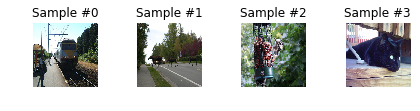

In [13]:
batch_iter = iter(data_loader)
for i in batch_iter:
    for j in range(4):
        ax = plt.subplot(1, 4, j + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(j))
        ax.axis('off')
        plt.imshow(i[0][j])
    break